<a href="https://colab.research.google.com/github/virf96/Chat-Bot/blob/master/DatosFaltantes_SustitucionCategoriaAdicional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sustitución usando una etiqueta adicional en variables categóricas

Este es el método de sustitución más usado con variables categóricas. Este método considera los valores faltantes como una categoría o etiqueta adicional de la variable, por lo tanto todas las observaciones con valores ausentes son agrupadas con esta nueva etiqueta 'faltante' o 'missing' en inglés.

En esencia, es equivalente a la sustitución por valores arbitrarios en variables numéricas.

Una ventaja de esta técnica es que no asume nada sobre los datos ausentes y es apropiada cuando el número de valores faltantes es alto.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la 'ausencia' (si existe)
- No asume nada acerca de los valores ausentes


### Limitaciones

- Si el número de NA es bajo, crear una categoría adicional puede causar sobre-ajustes en los árboles de decisión 

Este es un método bastante utilizado en competencias de ciencia de datos y organizaciones. Por ejemplo, mira la solución ganadora de la competencia KDD 2009 : "Winning the KDD Cup Orange Challenge with Ensemble Selection" (http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

### En este demo:

Vamos a aprender cómo reemplazar datos faltantes con la cadena de caracteres ‘Missing’ usando pandas y los datos Ames House Price 



In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### House Prices dataset

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# carguemos los datos con unas columnas

# estas son las columnas categóricas y la variable target SalePrice (precio de venta)
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('/content/drive/My Drive/datasets/houseprice.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [37]:
# evaluemos el porcentaje de valores nulos por cada una de las variables
#Notamos que 'BsmtQual' tiene el 2.5% de datos faltantes
#Notamos que 'FireplaceQu' tiene el 47% de datos faltantes
data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

Cuando reemplazamos los valores nulos NA en variables categóricas por una etiqueta 'Missing', en principio no hay diferencia si hacemos la sustitución antes o después de separar los datos en sets de entrenamiento y prueba.


Sin embargo, no recomendamos esta práctica. 
Es mejor adherirse a la premisa de separar el set de datos original en sets de entrenamiento y prueba al comienzo de la construcción del modelo de machine learning. Por lo tanto seguiremos con esta práctica en este demo.


In [38]:
# separar datos en sets entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # porcentaje de obs en test set
    random_state=0) # semilla para reproducibilidad

X_train.shape, X_test.shape

((1022, 3), (438, 3))

#### BsmtQual

In [39]:
# % de valores ausentes
#El porcentaje de NA bajo debido a que estamos trabajando con el 70% de la base original
X_train['BsmtQual'].isnull().mean()

0.023483365949119372

In [40]:
#Frecuencia de aparición de cada categoría
X_train['BsmtQual'].value_counts().sort_values(ascending=False)

TA    463
Gd    430
Ex     82
Fa     23
Name: BsmtQual, dtype: int64

In [41]:
X_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Fa', nan, 'Ex'], dtype=object)

Text(0, 0.5, 'Número de casas')

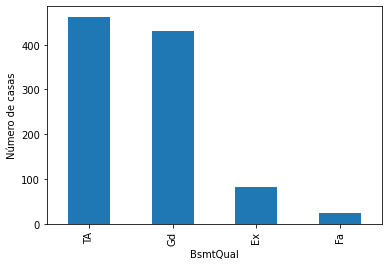

In [42]:
# exploremos el número de observaciones por categoría en BsmtQual

#Observamos que 
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Número de casas')

In [43]:
# reemplacemos NA en los sets de prueba y entrenamiento

# usemos el método fillna() de pandas

# con el argumento inplace=True, indicándole a pandas
# que queremos reemplazar los valores en los dataframes originales

X_train['BsmtQual'].fillna('Missing', inplace=True)
X_test['BsmtQual'].fillna('Missing', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [44]:
#Frecuencia después de la imputación
X_train['BsmtQual'].value_counts().sort_values(ascending=False)

TA         463
Gd         430
Ex          82
Missing     24
Fa          23
Name: BsmtQual, dtype: int64

In [45]:
X_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Fa', 'Missing', 'Ex'], dtype=object)

Text(0, 0.5, 'Number of houses')

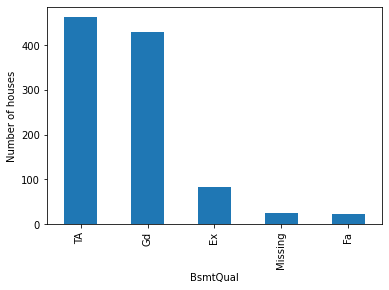

In [46]:
# evaluemos el número de casas por categoría en la variables que acabamos de sustituir
# Una vez agregada la etiqueta "Missing" podemos visualizar su frecuencia en la gráfica de barras
X_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Podemos ver la nueva categoria: **Missing**

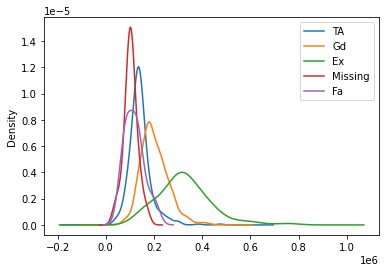

In [47]:
# grafiquemos la distribución del target (SalePrice -precio de venta)
# para las casas que muestran las diferentes categorías en la variable BsmtQual

fig = plt.figure()
ax = fig.add_subplot(111)

# gráfica por categoría
#Visulizamos la densidad de la distibución de precios para cada una de las categorías existentes.
X_train[X_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# leyenda
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

In [48]:
print('Promedio de precios para la categoría TA:',X_train[X_train['BsmtQual']=='TA']['SalePrice'].mean())
print('Promedio de precios para la categoría Gd:',X_train[X_train['BsmtQual']=='Gd']['SalePrice'].mean())
print('Promedio de precios para la categoría Ex:',X_train[X_train['BsmtQual']=='Ex']['SalePrice'].mean())
print('Promedio de precios para la categoría Missing:',X_train[X_train['BsmtQual']=='Missing']['SalePrice'].mean())
print('Promedio de precios para la categoría FA:',X_train[X_train['BsmtQual']=='Fa']['SalePrice'].mean())


Promedio de precios para la categoría TA: 141808.65010799136
Promedio de precios para la categoría Gd: 202298.8558139535
Promedio de precios para la categoría Ex: 325808.64634146343
Promedio de precios para la categoría Missing: 103389.75
Promedio de precios para la categoría FA: 118067.39130434782


Como podemos ver, las casas que muestran diferentes etiquetas para la variable BsmtQual, tienen también, en promedio, diferentes precios finales de venta. Por ejemplo casas con la categoría Ex (de excelente) suelen tener mayor precio que casas con la categoría Fa (de fair en inglés, razonable). Vemos que las casas que no tenían etiqueta, y ahora están agrupadas con **Missing**, tienen un precio de venta relativamente alto.


#### FirePlaceQu

In [16]:
# determinemos el % de valores faltantes otra vez
#El porcentaje de valores nulos es alto, está técnica es apropiada para estos casos
X_train['FireplaceQu'].isnull().mean()

0.46771037181996084

In [17]:
#Frecuencia de categorías
X_train['FireplaceQu'].value_counts().sort_values(ascending=False)

Gd    255
TA    229
Fa     26
Ex     18
Po     16
Name: FireplaceQu, dtype: int64

In [19]:
X_train['FireplaceQu'].unique()

array([nan, 'Gd', 'TA', 'Fa', 'Po', 'Ex'], dtype=object)

Text(0, 0.5, 'Number of houses')

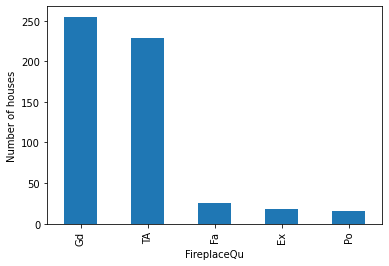

In [20]:
# veamos el número de casas por categoría para esta variable

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

In [21]:
# reemplacemos NA en los segmentos de prueba y entrenamiento
# con una nueva categoría 'Missing'

X_train['FireplaceQu'].fillna('Missing', inplace=True)
X_test['FireplaceQu'].fillna('Missing', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [23]:
#Visualizamos la frecuencia de la categoría
X_train['FireplaceQu'].value_counts().sort_values(ascending=False)

Missing    478
Gd         255
TA         229
Fa          26
Ex          18
Po          16
Name: FireplaceQu, dtype: int64

In [24]:
X_train['FireplaceQu'].unique()

array(['Missing', 'Gd', 'TA', 'Fa', 'Po', 'Ex'], dtype=object)

Text(0, 0.5, 'Número de casas')

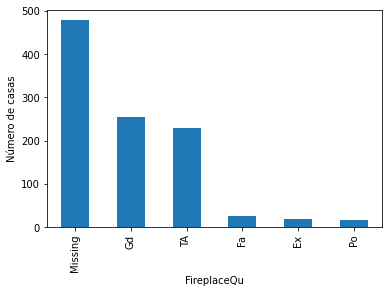

In [25]:
# evaluemos el efecto de este cambio en la distribución de 
# la variable sustituida

X_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Número de casas')

Vemos la categoría adicional para los valores ausentes: Missing

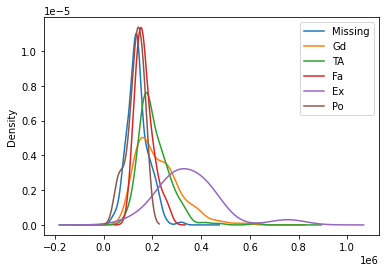

In [26]:
# grafiquemos la distribución del target (SalePrice - precio de venta)
# para diferentes categorías de la variable FireplaceQu.

fig = plt.figure()
ax = fig.add_subplot(111)

# una gráfica por categoría
#Observamos la densidad de la distribución de precios para cada categoría de set de datos
X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
X_train[X_train['FireplaceQu']=='Po']['SalePrice'].plot(kind='kde', ax=ax)

# leyendas
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

In [33]:
print('promedio de precios para categoría Missing:',X_train[X_train['FireplaceQu']=='Missing']['SalePrice'].mean())
print('promedio de precios para categoría Gd:',X_train[X_train['FireplaceQu']=='Gd']['SalePrice'].mean())
print('promedio de precios para categoría TA:',X_train[X_train['FireplaceQu']=='TA']['SalePrice'].mean())
print('promedio de precios para categoría FA:',X_train[X_train['FireplaceQu']=='Fa']['SalePrice'].mean())
print('promedio de precios para categoría Ex:',X_train[X_train['FireplaceQu']=='Ex']['SalePrice'].mean())
print('promedio de precios para categoría Po:',X_train[X_train['FireplaceQu']=='Po']['SalePrice'].mean())


promedio de precios para categoría Missing: 140740.83263598327
promedio de precios para categoría Gd: 223413.58039215687
promedio de precios para categoría TA: 207675.58951965065
promedio de precios para categoría FA: 167000.0
promedio de precios para categoría Ex: 351475.1111111111
promedio de precios para categoría Po: 130517.6875


Observemos nuevamente las casas y las diferentes categorías para la variable FireplaceQu. Podemos ver que las casas tienen diferentes distribuciones para el target SalePrice: las casas con la etiqueta Ex son las más costosas así como las de la categoría Missing, mientras que casas con la categoría Fa son las más baratas.



In [28]:
#hacerlo de forma general


def automate_plot(df, variable, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[variable].unique():
        df[df[variable]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        

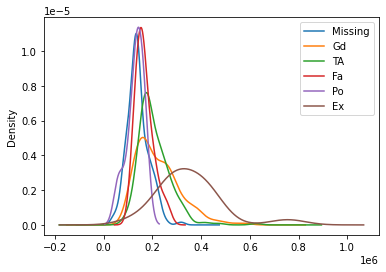

In [29]:
automate_plot(X_train, 'FireplaceQu', 'SalePrice')

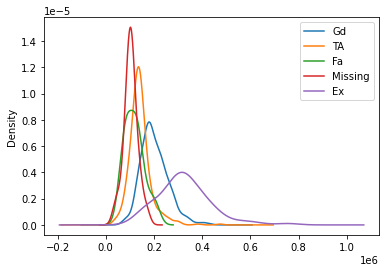

In [30]:
automate_plot(X_train, 'BsmtQual', 'SalePrice')